In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum() #no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

classification - check fi classes are balanced or imbalanced

`pip install imblearn` to handle imbalance

<Axes: ylabel='count'>

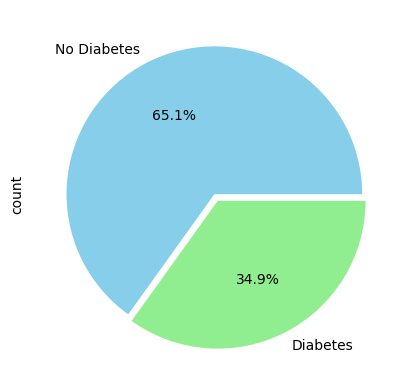

In [4]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%',
                               labels=['No Diabetes', 'Diabetes'],
                               colors=['skyblue', 'lightgreen'],explode=[0,0.05])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training data =>", X_train.shape, X_train.shape)

training data => (614, 8) (614, 8)


In [7]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [8]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

grid search cv-to find best paramethers for the model

In [9]:
list(range(5,100,10)) #just to see the range

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [10]:
params = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': list(range(5,100,10))
}

grid = GridSearchCV(model, param_grid=params, cv=5, verbose=1)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

fiting the model

In [11]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

best parameters


In [12]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 5}

all the metrics as a dataframe

In [13]:
result_df = pd.DataFrame(grid.cv_results_)
result_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006201,0.000748,0.002400,0.000486,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.739837,0.731707,0.780488,0.756098,0.680328,0.737692,0.033170,1
4,0.006001,0.000633,0.001802,0.000397,gini,45,"{'dt__criterion': 'gini', 'dt__max_depth': 45}",0.691057,0.682927,0.772358,0.739837,0.713115,0.719859,0.032846,2
20,0.004799,0.000401,0.001799,0.000401,log_loss,5,"{'dt__criterion': 'log_loss', 'dt__max_depth': 5}",0.691057,0.707317,0.747967,0.699187,0.737705,0.716647,0.022231,3
10,0.004599,0.000490,0.001807,0.000397,entropy,5,"{'dt__criterion': 'entropy', 'dt__max_depth': 5}",0.699187,0.707317,0.747967,0.699187,0.729508,0.716633,0.019200,4
3,0.006198,0.000397,0.002802,0.000402,gini,35,"{'dt__criterion': 'gini', 'dt__max_depth': 35}",0.699187,0.691057,0.796748,0.731707,0.663934,0.716527,0.045566,5
21,0.006000,0.000006,0.001197,0.000396,log_loss,15,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.666667,0.699187,0.764228,0.739837,0.704918,0.714967,0.033847,6
6,0.004801,0.000399,0.002203,0.000398,gini,65,"{'dt__criterion': 'gini', 'dt__max_depth': 65}",0.682927,0.674797,0.813008,0.723577,0.680328,0.714927,0.052012,7
2,0.006604,0.000795,0.002397,0.000491,gini,25,"{'dt__criterion': 'gini', 'dt__max_depth': 25}",0.715447,0.674797,0.788618,0.715447,0.680328,0.714927,0.040592,8
25,0.005598,0.000484,0.002199,0.000400,log_loss,55,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.682927,0.699187,0.764228,0.723577,0.696721,0.713328,0.028621,9
9,0.006000,0.000634,0.001599,0.000489,gini,95,"{'dt__criterion': 'gini', 'dt__max_depth': 95}",0.691057,0.666667,0.764228,0.756098,0.688525,0.713315,0.039264,10


extract the best model

In [14]:
model_to_save=grid.best_estimator_
model_to_save

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=5))])

check the confusion matrix

In [15]:
y_pred = model_to_save.predict(X_test)
cf= confusion_matrix(y_test, y_pred)
cf

array([[85, 13],
       [24, 32]], dtype=int64)

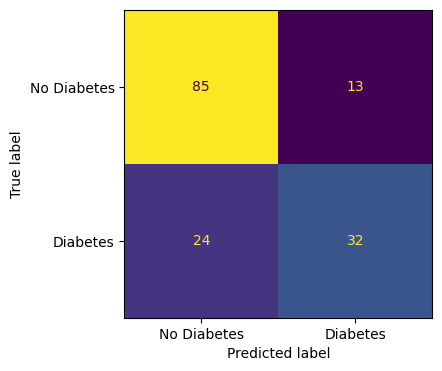

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay(cf, display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax, colorbar=False)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        98
           1       0.71      0.57      0.63        56

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



plotting grid search results

<Axes: >

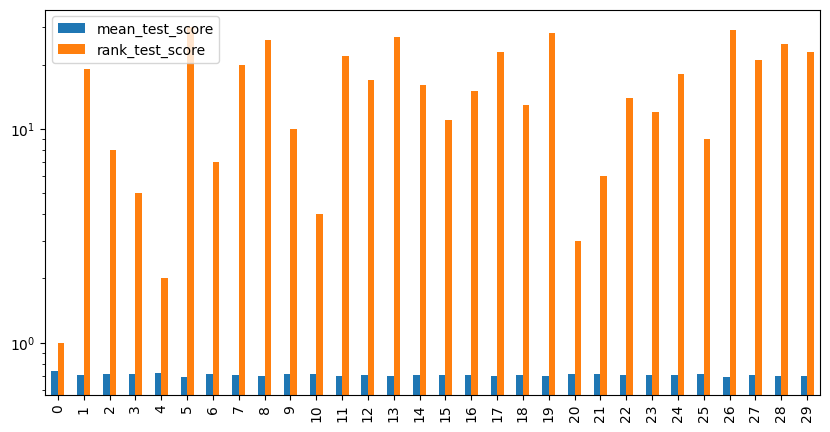

In [18]:
result_df[['mean_test_score', 'rank_test_score']].plot(kind='bar', logy=True, figsize=(10,5))

In [19]:
import joblib

joblib.dump(model_to_save, 'diabetes_model.pkl')

['diabetes_model.pkl']

# task  -> make a gradio app for this model


Understanding Undersampling


In [20]:
!pip install imblearn

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
print("before undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', autopct='%.1f%%',
                               labels=['No Diabetes', 'Diabetes'],
                               colors=['skyblue', 'lightgreen'],explode=[0,0.05]
                               ax=ax)
X_train, y_train = rus.fit_resample(X_train, y_train)
print("after undersample")
print(y_train.value_counts())
